<a href="https://colab.research.google.com/github/Phanttan/Deep-learning-with-Python-Francois-Chollet/blob/main/5_2_using_convnets_with_small_datasets_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and unzipping data
## Train (train and validation)
12500 pictures of dog

12500 pictures of cat
## Test
12500 pictures both dogs and cats

In [ ]:
import zipfile
def unZipData(path_to_zip_file, directory_to_extract_to):
  with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
original_data_folder = '/content/drive/My Drive/ColabNotebooks/datasets'
dogcat_zippath = os.path.join(original_data_folder, 'dogs-vs-cats.zip')
dogcat_folder = os.path.join(original_data_folder, 'dogcat')

In [ ]:

test_zippath = os.path.join(dogcat_folder, 'test1.zip')
unZipData(test_zippath, dogcat_folder)

In [ ]:
train_zippath = os.path.join(dogcat_folder, 'train.zip')
unZipData(train_zippath, dogcat_folder)

## Define directory folders

In [ ]:
import os
original_data_folder = '/content/drive/My Drive/ColabNotebooks/datasets'
# Directories for training, validation and testing
base_dir = os.path.join(original_data_folder, 'cats_dogs_small')
try: 
  os.mkdir(base_dir)
except OSError as err:
  print(err)

train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except OSError as err:
  print(err)

vali_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(vali_dir)
except OSError as err:
  print(err)

test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except OSError as err:
  print(err)

[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/validation'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/test'


In [ ]:
# Directory for cat
import os
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except OSError as err:
  print(err)
vali_cats_dir = os.path.join(vali_dir, 'cats')
try:
  os.mkdir(vali_cats_dir)
except OSError as err:
  print(err)
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except OSError as err:
  print(err)

[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train/cats'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/validation/cats'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/test/cats'


In [ ]:
# Directory for dog
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except OSError as err:
  print(err)
vali_dogs_dir = os.path.join(vali_dir, 'dogs')
try:
  os.mkdir(vali_dogs_dir)
except OSError as err:
  print(err)
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except OSError as err:
  print(err)

[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train/dogs'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/validation/dogs'
[Errno 17] File exists: '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/test/dogs'


In [ ]:
dogcat_folder = '/content/drive/My Drive/ColabNotebooks/datasets/dogcat'
original_train_data = os.path.join(dogcat_folder, 'train')

In [ ]:
# copy first 1000 cat imagines to train
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(vali_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(vali_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_train_data, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

# Upload file from local folder


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Building Network
## Three Main Parts 

1. Convolution layer: extract features from original data (blur, edge detection...)
2. Pooling layer : reduce spatial dimensions
3. Full connected layer : Dense


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Processing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
train_dir = '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train'
vali_dir = '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/validation'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    vali_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 100,
    epochs = 30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 673s 7s/step - loss: 0.6879 - acc: 0.5375 - val_loss: 0.6624 - val_acc: 0.5870
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6447 - acc: 0.6255 - val_loss: 0.6278 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5952 - acc: 0.6740 - val_loss: 0.6064 - val_acc: 0.6670
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5473 - acc: 0.7160 - val_loss: 0.5868 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5254 - acc: 0.7400 - val_loss: 0.5858 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.4874 - acc: 0.7680 - val_loss: 0.5867 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4655 - acc: 0.7710 - val_loss: 0.5615

In [ ]:
model.save("cats_vs_dogs_smalldata_1")
model.save("/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small")

INFO:tensorflow:Assets written to: cats_vs_dogs_smalldata_1/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/assets


In [ ]:
import tensorflow, keras
tensorflow.__version__
loaded = keras.models.load_model("/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small")


In [ ]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Prepare data to plot 

In [ ]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)

## Plot data

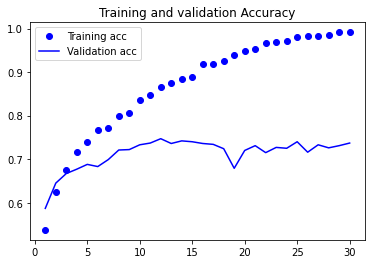

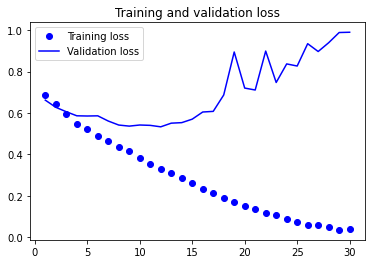

In [33]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data augmentation configuration via ImageDataGenerator

In [35]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Display randome augmented training image

In [36]:
import random
chose_image_ind = random.randint(1,1001)
chose_image_ind

211

In [37]:
img_path = '/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train/cats/cat.{}.jpg'.format(chose_image_ind)
img_path

'/content/drive/My Drive/ColabNotebooks/datasets/cats_dogs_small/train/cats/cat.211.jpg'

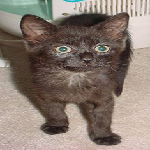

In [38]:
from keras.preprocessing import image
img= image.load_img(img_path, target_size=(150,150))
img

In [ ]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x

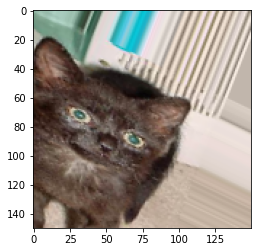

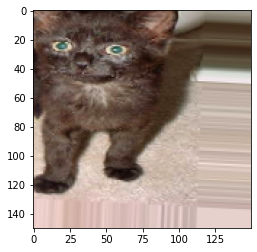

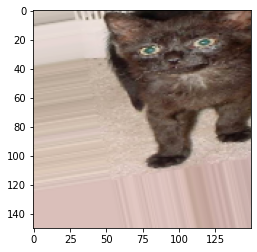

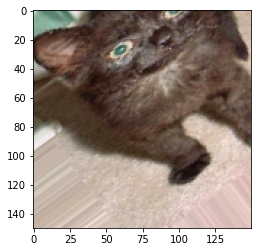

In [40]:
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4==0:
    break
plt.show()